In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

# Create an endpoint URL for a city.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# city_url = url + "&q=" + "Boston"

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-40.119794966152305 75.32900637067746
-27.301574909674983 35.64931473985152
16.432169964713978 79.9215459817878
-38.5607493214033 -148.66850615776463
44.84848690818637 -94.7388599222173
-9.493000516609811 -173.13665962080742
-53.00615671830041 157.68297957385323
-59.70159867103577 99.64729382234867
-5.746398040541521 -161.72915086263512
-1.0538090734541186 -53.4164351873339
-10.80164412696466 -150.96528723036326
-51.70319546355499 27.207209793417093
32.06163331551761 81.91136003431274
7.189684817272962 -41.85391014232755
69.42012071983277 -37.6821907080064
-20.79034095177842 -115.49757987294235
-64.27715270841594 -55.07457950270499
9.05312481744319 62.527479956169685
-75.3137383991787 125.02878977921398
-1.9077999201041251 54.605431152265396
-71.47321047062438 -23.503120728484873
-27.412751583771623 -38.25055458715926
-16.981582404014745 92.30424642687893
-75.57795262050524 101.01687563862845
-14.540543080280415 -123.69496915548137
55.145323173349624 -148.85562387678317
-5.780166573432

2.4760453783133585 86.06047299430043
-67.34783845776153 25.680386150027317
31.061056204705295 34.845105060882844
4.711962757619133 155.5830017325939
88.7425694866559 113.07037603412726
-40.93411465735605 149.85307432376965
19.834037741795512 -38.68203046468011
32.94045966622015 -67.46347880438985
38.72314835632292 -10.72255725667813
88.00105074605366 20.8514676859798
-7.979478893727801 132.61755824848757
-35.2715378349444 101.68454075972318
-17.09414386356258 -105.70755063069706
21.421719961636768 -0.9076018976758746
-24.538396015882114 -82.42249359663968
3.8071923575659525 70.06738904651291
-72.81879427165903 -179.43065565743257
11.669398236483232 -38.50546556704569
-34.94554513964746 172.46240603471517
18.085877819689927 108.43630941369219
-89.45069507905407 -83.8224786030182
26.377086939320165 85.38677424546859
12.825882890277413 -92.57832668027633
86.32960732211205 119.53034213244587
89.41479300207953 -54.445806460795865
51.1641907818036 112.06746584113614
-25.595186666363844 136.3

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

596

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(20)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | xai-xai
Processing Record 3 of Set 1 | narasaraopet
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | hutchinson
Processing Record 6 of Set 1 | sataua
City not found. Skipping...
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | prainha
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | dharchula
Processing Record 14 of Set 1 | carutapera
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 

City not found. Skipping...
Processing Record 40 of Set 4 | nahrin
Processing Record 41 of Set 4 | lahij
Processing Record 42 of Set 4 | eucaliptus
Processing Record 43 of Set 4 | orichi
Processing Record 44 of Set 4 | celestun
Processing Record 45 of Set 4 | san jeronimo
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | pathein
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | zhezkazgan
Processing Record 50 of Set 4 | japura
Processing Record 1 of Set 5 | gore
Processing Record 2 of Set 5 | requena
Processing Record 3 of Set 5 | katobu
Processing Record 4 of Set 5 | teguldet
Processing Record 5 of Set 5 | gidole
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | tiznit
Processing Record 9 of Set 5 | chuy
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | bonthe
Processing Record 12 of Set 5 | havelock
Processing Record 13 

Processing Record 29 of Set 8 | kloulklubed
Processing Record 30 of Set 8 | bangui
Processing Record 31 of Set 8 | alofi
Processing Record 32 of Set 8 | highland springs
Processing Record 33 of Set 8 | burica
City not found. Skipping...
Processing Record 34 of Set 8 | palmer
Processing Record 35 of Set 8 | mogadishu
Processing Record 36 of Set 8 | ixtapa
Processing Record 37 of Set 8 | meulaboh
Processing Record 38 of Set 8 | kalmunai
Processing Record 39 of Set 8 | turayf
Processing Record 40 of Set 8 | egvekinot
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | ulladulla
Processing Record 43 of Set 8 | paracuru
Processing Record 44 of Set 8 | omboue
Processing Record 45 of Set 8 | tara
Processing Record 46 of Set 8 | necochea
Processing Record 47 of Set 8 | saint-georges
Processing Record 48 of Set 8 | evensk
Processing Record 49 of Set 8 | olafsvik
Processing Record 50 of Set 8 | muros
Processing Record 1 of Set 9 | umm lajj
Processing Record 2 of Set 9 |

Processing Record 17 of Set 12 | tsimlyansk
Processing Record 18 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 19 of Set 12 | la ronge
Processing Record 20 of Set 12 | cachoeiro de itapemirim
Processing Record 21 of Set 12 | ust-ilimsk
Processing Record 22 of Set 12 | paragominas
Processing Record 23 of Set 12 | akyab
Processing Record 24 of Set 12 | torres
Processing Record 25 of Set 12 | mimongo
Processing Record 26 of Set 12 | smithers
Processing Record 27 of Set 12 | marsa matruh
Processing Record 28 of Set 12 | kodinsk
Processing Record 29 of Set 12 | ko samui
Processing Record 30 of Set 12 | sena madureira
Processing Record 31 of Set 12 | pahrump
Processing Record 32 of Set 12 | sanming
Processing Record 33 of Set 12 | malwan
City not found. Skipping...
Processing Record 34 of Set 12 | korem
Processing Record 35 of Set 12 | payo
Processing Record 36 of Set 12 | macklin
Processing Record 37 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,70.25,65,100,21.36,MU,2022-07-02 19:06:37
1,Xai-Xai,-25.0519,33.6442,64.85,86,0,4.92,MZ,2022-07-02 19:06:37
2,Narasaraopet,16.2500,80.0667,88.57,55,100,3.04,IN,2022-07-02 19:06:38
3,Mataura,-46.1927,168.8643,45.48,95,71,3.60,NZ,2022-07-02 19:06:38
4,Hutchinson,38.0608,-97.9298,87.53,66,0,10.36,US,2022-07-02 19:02:59
5,Tuatapere,-46.1333,167.6833,43.81,89,47,5.61,NZ,2022-07-02 19:06:39
6,Busselton,-33.6500,115.3333,48.83,78,0,7.25,AU,2022-07-02 19:06:39
7,Prainha,-1.8000,-53.4800,86.97,56,47,5.41,BR,2022-07-02 19:06:40
8,Faanui,-16.4833,-151.7500,78.85,68,12,20.62,PF,2022-07-02 19:03:18
9,Port Elizabeth,-33.9180,25.5701,66.31,70,93,5.01,ZA,2022-07-02 19:06:41


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [18]:
# Get today's date in seconds.
today = time.time()
today

1656623642.9420378

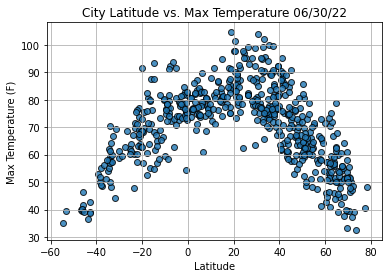

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

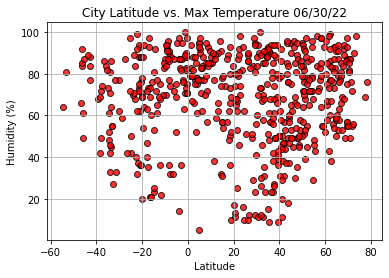

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,humidity, c='r', edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

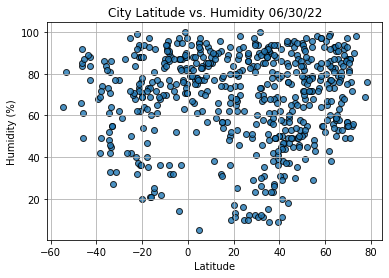

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

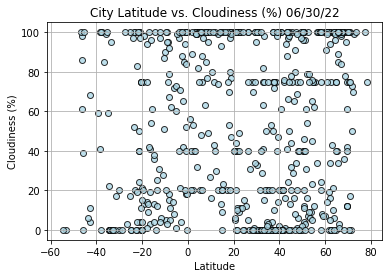

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            c='lightblue',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

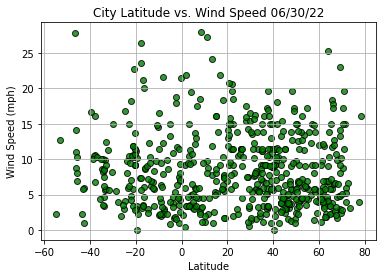

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            c='g',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Lat                        -33.65
Lng                      115.3333
Max Temp                    48.33
Humidity                       86
Cloudiness                      0
Wind Speed                    5.7
Country                        AU
Date          2022-06-30 18:44:09
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
565     True
566     True
567     True
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gueret,46.1667,1.8667,53.06,93,16,4.92,FR,2022-06-30 18:44:01
1,Albany,42.6001,-73.9662,81.64,44,16,1.01,US,2022-06-30 18:44:02
4,Dalfsen,52.5000,6.2500,64.96,86,100,16.08,NL,2022-06-30 18:44:03
5,Barrow,71.2906,-156.7887,50.02,76,0,14.97,US,2022-06-30 18:44:04
7,Cao Bang,22.6667,106.2500,75.45,98,100,1.90,VN,2022-06-30 18:40:18


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

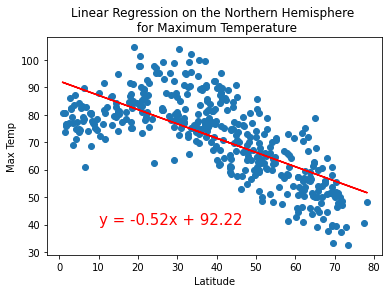

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

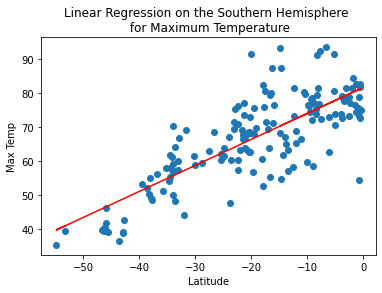

In [56]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(50, 120))

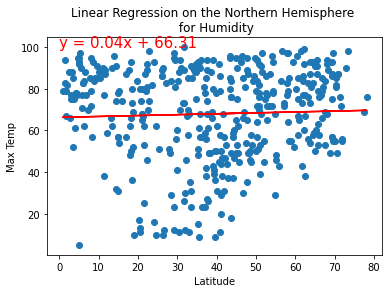

In [59]:
# Linear regression on the Northern/Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Humidity', 'Max Temp',(0, 100))

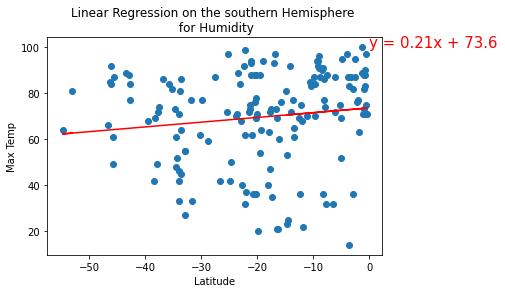

In [61]:
# Linear regression on the Northern/Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the southern Hemisphere \n for Humidity', 'Max Temp',(0, 100))

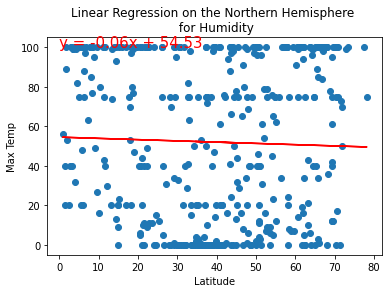

In [62]:
# Linear regression on the Northern/Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Humidity', 'Max Temp',(0, 100))

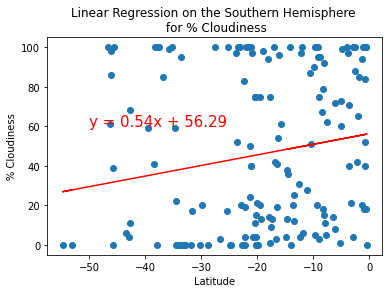

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

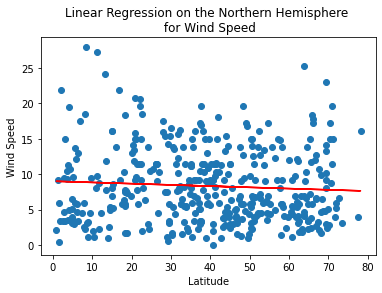

In [69]:
# Linear regression on the Northern/Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0, 100))

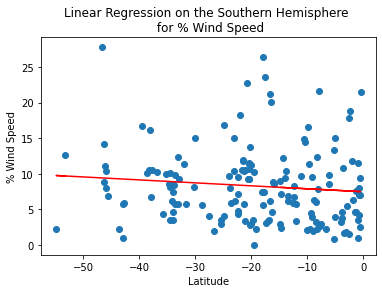

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Wind Speed', '% Wind Speed', (-50,60))